In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Assuming the CSV file is named 'data.csv'
csv_file_path = './clustered_values.csv'  # replace with your actual path

# Load the data
data = pd.read_csv(csv_file_path)

# 1) Split the samples into train and testing, ensuring training samples from different clusters
X = data[['curvature', 'torsion', 'degree']]
y = data['cluster number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

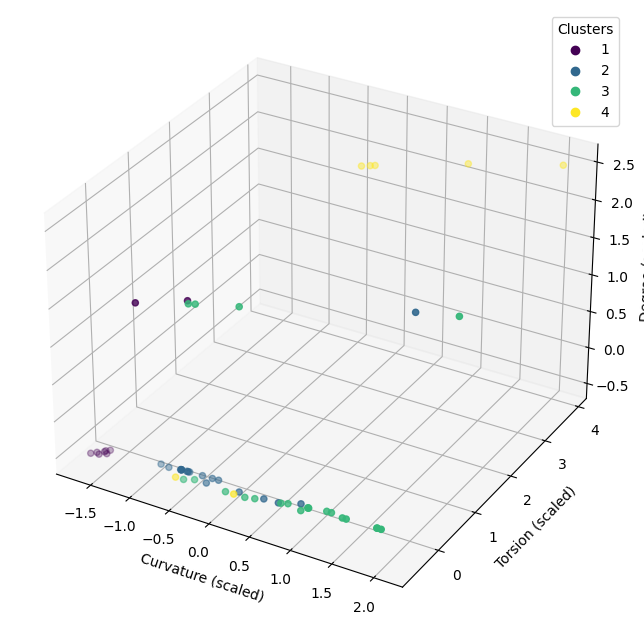

In [5]:
# Visualize the clusters obtained from stage 1

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Curvature (scaled)')
ax.set_ylabel('Torsion (scaled)')
ax.set_zlabel('Degree (scaled)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [6]:
# write the plot to an interactive html file

import plotly.express as px

# Assuming 'kmeans' is your fitted clustering model and 'X_train_scaled' is your dataset
fig = px.scatter_3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=X_scaled[:, 2],
    color=y.astype(str)  # Convert cluster labels to string for coloring
)
fig.write_html('stage1_visualization.html')  # Save the figure as an HTML file

In [20]:
# 3) Train a classifier to predict the cluster number based on curvature, torsion, and degree
# For simplicity, we use KNeighborsClassifier here
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Save the model using joblib
from joblib import dump
dump(knn, 'knn_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         4
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         1

    accuracy                           0.83        12
   macro avg       0.93      0.88      0.88        12
weighted avg       0.88      0.83      0.82        12



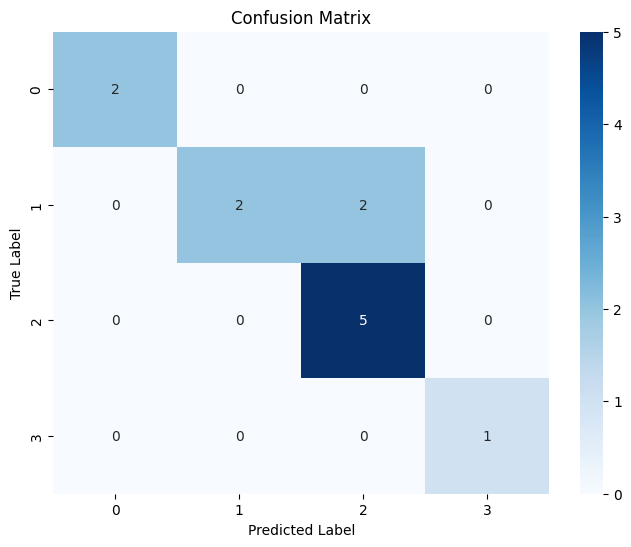

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from joblib import load

# Load the trained KNN model and scaler
knn_loaded = load('knn_model.joblib')
scaler = load('scaler.joblib')

# Assuming X_test_scaled has already been scaled using the scaler
# Predict the cluster for the testing samples
predicted_clusters = knn_loaded.predict(X_test_scaled)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, predicted_clusters)
class_report = classification_report(y_test, predicted_clusters)
conf_matrix = confusion_matrix(y_test, predicted_clusters)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()